# Лаба 1

In [1]:
import numpy as np

In [18]:
e = 0.0001

In [3]:
def bisection(f,a,b):
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    x = (a + b) / 2
    while np.fabs(f(x)) > e:
        a, b = (a, x) if f(a)*f(x) < 0 else (x, b)
        x = (a + b) / 2
    return x

In [4]:
funct = lambda x: np.tan(x) - x - 0.5
Dfunct = lambda x: (1 / np.cos(x)**2) - 1

In [5]:
sol = bisection(funct,0,np.pi/3)
print(sol, format(funct(sol), '.8f'))

0.9749726224336488 -0.00009696


In [2]:
import matplotlib.pyplot as plt

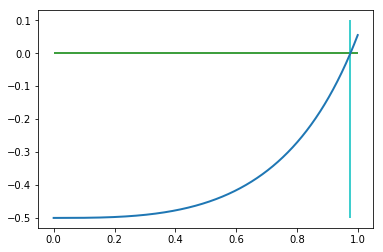

In [7]:
X = np.arange(0.0, 1.0, 0.001)
plt.figure()
plt.plot(X, funct(X),linewidth=2)
plt.hlines(0, 0, 1, color='g')
plt.vlines(bisection(funct,0,np.pi/3), -0.5, 0.1, color='c')

In [8]:
def secant(f, x0, x1):
    f_x0 = f(x0)
    f_x1 = f(x1)
    iter_count = 0
    while np.fabs(f_x1) > e:
        try:
            k = float(f_x1 - f_x0)/(x1 - x0)
            x = x0 - float(f_x0)/k
        except ZeroDivisionError:
            print ("error: zero division error for x = ", x)
            sys.exit(1)     
        x0 = x1
        x1 = x
        f_x0 = f_x1
        f_x1 = f(x1)
        iter_count += 1
    print(iter_count, " interations")
    return x1

In [18]:
sol = secant(funct,0,np.pi/3)
print(sol, format(funct(sol), '.8f'))

6  interations
0.975017332258772 0.00000030


In [3]:
from scipy import misc

In [13]:
def newton(f,Df,x0):
    x = x0
    fx = f(x)
    while np.fabs(fx) > e:
        Dfx = Df(x)
        if Dfx == 0:
            print('zero derivative')
            return None
        x = x - fx/Dfx
        fx = f(x)
    return x

In [16]:
sol = newton(funct,Dfunct,np.pi/3)
print(sol, format(funct(sol), '.8f'))

0.9750173151388035 0.00000027


In [4]:
from prettytable import PrettyTable

In [131]:
def bisection2(f,a,b):
    iter_count = 0
    t = PrettyTable(['n', 'xl', 'f(xl)', 'xr', 'f(xr)', 'xr - xl'])
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    x = (a + b) / 2
    t.add_row([iter_count, format(a, '.6f'), format(f(a), '.6f'), format(b, '.6f'), format(f(b), '.6f'), format(np.fabs(b-a), '.6f')])
    while np.fabs(f(x)) > e:
        iter_count += 1
        a, b = (a, x) if f(a)*f(x) < 0 else (x, b)
        t.add_row([iter_count, format(a, '.6f'), format(f(a), '.6f'), format(b, '.6f'), format(f(b), '.6f'), format(np.fabs(b-a), '.6f')])
        x = (a + b) / 2
    t.add_row([iter_count+1, format(x, '.6f'), format(f(x), '.6f'), format(b, '.6f'), format(f(b), '.6f'), format(np.fabs(b-x), '.6f')])
    print(t)
    return x

In [133]:
f = lambda x: np.tan(x) + x - 1
bisection2(funct,0,np.pi/3)

+----+----------+-----------+----------+----------+----------+
| n  |    xl    |   f(xl)   |    xr    |  f(xr)   | xr - xl  |
+----+----------+-----------+----------+----------+----------+
| 0  | 0.000000 | -0.500000 | 1.047198 | 0.184853 | 1.047198 |
| 1  | 0.523599 | -0.446249 | 1.047198 | 0.184853 | 0.523599 |
| 2  | 0.785398 | -0.285398 | 1.047198 | 0.184853 | 0.261799 |
| 3  | 0.916298 | -0.113072 | 1.047198 | 0.184853 | 0.130900 |
| 4  | 0.916298 | -0.113072 | 0.981748 | 0.014858 | 0.065450 |
| 5  | 0.949023 | -0.053524 | 0.981748 | 0.014858 | 0.032725 |
| 6  | 0.965385 | -0.020528 | 0.981748 | 0.014858 | 0.016362 |
| 7  | 0.973566 | -0.003146 | 0.981748 | 0.014858 | 0.008181 |
| 8  | 0.973566 | -0.003146 | 0.977657 | 0.005776 | 0.004091 |
| 9  | 0.973566 | -0.003146 | 0.975612 | 0.001295 | 0.002045 |
| 10 | 0.974589 | -0.000930 | 0.975612 | 0.001295 | 0.001023 |
| 11 | 0.974589 | -0.000930 | 0.975100 | 0.000181 | 0.000511 |
| 12 | 0.974845 | -0.000375 | 0.975100 | 0.000181 | 0.0

0.9749726224336488

In [129]:
def secant2(f, x0, x1):
    iter_count = 0
    t = PrettyTable(['n', 'Xn', 'f(Xn)', 'Xn+1', 'f(Xn+1)', 'Xn+1 - Xn'])
    f_x0 = f(x0)
    f_x1 = f(x1)
    t.add_row([iter_count, format(x0, '.6f'), format(f_x0, '.6f'), format(x1, '.6f'), format(f_x1, '.6f'), format(np.fabs(x1 - x0), '.6f')])
    while np.fabs(f_x0) > e:
        try:
            k = float(f_x1 - f_x0)/(x1 - x0)
            x = x0 - float(f_x0)/k
        except ZeroDivisionError:
            print ("zero division error for x = ", x)
            sys.exit(1) 
        iter_count += 1
        x0 = x1
        x1 = x  
        f_x0 = f_x1
        f_x1 = f(x1)
        t.add_row([iter_count, format(x0, '.6f'), format(f_x0, '.6f'), format(x1, '.6f'), format(f_x1, '.6f'), format(np.fabs(x1 - x0), '.6f')])
    print(t)
    return x0

In [134]:
secant2(f,0.2,1.2)

+---+----------+-----------+----------+-----------+-----------+
| n |    Xn    |   f(Xn)   |   Xn+1   |  f(Xn+1)  | Xn+1 - Xn |
+---+----------+-----------+----------+-----------+-----------+
| 0 | 0.200000 | -0.597290 | 1.200000 |  2.772152 |  1.000000 |
| 1 | 1.200000 |  2.772152 | 0.377267 | -0.226486 |  0.822733 |
| 2 | 0.377267 | -0.226486 | 0.439408 | -0.090535 |  0.062141 |
| 3 | 0.439408 | -0.090535 | 0.480790 |  0.002405 |  0.041382 |
| 4 | 0.480790 |  0.002405 | 0.479719 | -0.000027 |  0.001071 |
| 5 | 0.479719 | -0.000027 | 0.479731 | -0.000000 |  0.000012 |
+---+----------+-----------+----------+-----------+-----------+


0.47971899546873786

In [114]:
Df = lambda x: (1 / np.cos(x)**2) + 1

In [124]:
def newton2(f,Df,x0):
    iter_count = 0
    t = PrettyTable(['n', 'Xn', 'f(Xn)', 'Df(Xn)', 'Xn+1', 'Xn+1 - Xn'])
    x = x0
    fx = f(x)
    Dfx = Df(x)
    if Dfx == 0:
        print('zero derivative')
        return None
    t.add_row([iter_count, format(x, '.6f'), format(fx, '.6f'), format(Dfx, '.6f'), format(x - fx/Dfx, '.6f'), format(np.fabs(fx/Dfx), '.6f')])
    while np.fabs(fx) > e:      
        x = x - fx/Dfx
        fx = f(x)
        Dfx = Df(x)
        if Dfx == 0:
            print('zero derivative')
            return None
        iter_count += 1
        t.add_row([iter_count, format(x, '.6f'), format(fx, '.6f'), format(Dfx, '.6f'), format(x - fx/Dfx, '.6f'), format(np.fabs(fx/Dfx), '.6f')])
    print(t)
    return x

In [125]:
newton2(funct,Dfunct,np.pi/3)

+---+----------+----------+----------+----------+-----------+
| n |    Xn    |  f(Xn)   |  Df(Xn)  |   Xn+1   | Xn+1 - Xn |
+---+----------+----------+----------+----------+-----------+
| 0 | 1.047198 | 0.184853 | 3.000000 | 0.985580 |  0.061618 |
| 1 | 0.985580 | 0.023513 | 2.277361 | 0.975255 |  0.010325 |
| 2 | 0.975255 | 0.000518 | 2.177906 | 0.975017 |  0.000238 |
| 3 | 0.975017 | 0.000000 | 2.175677 | 0.975017 |  0.000000 |
+---+----------+----------+----------+----------+-----------+


0.9750173151388035